# Project Milestone
### Chen, Xianglin; Dai, Anlin

# 0.Packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from sklearn import preprocessing

# 1. Import dataset from kaggle

Reference: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?datasetId=138&sortBy=voteCount&searchQuery=regression

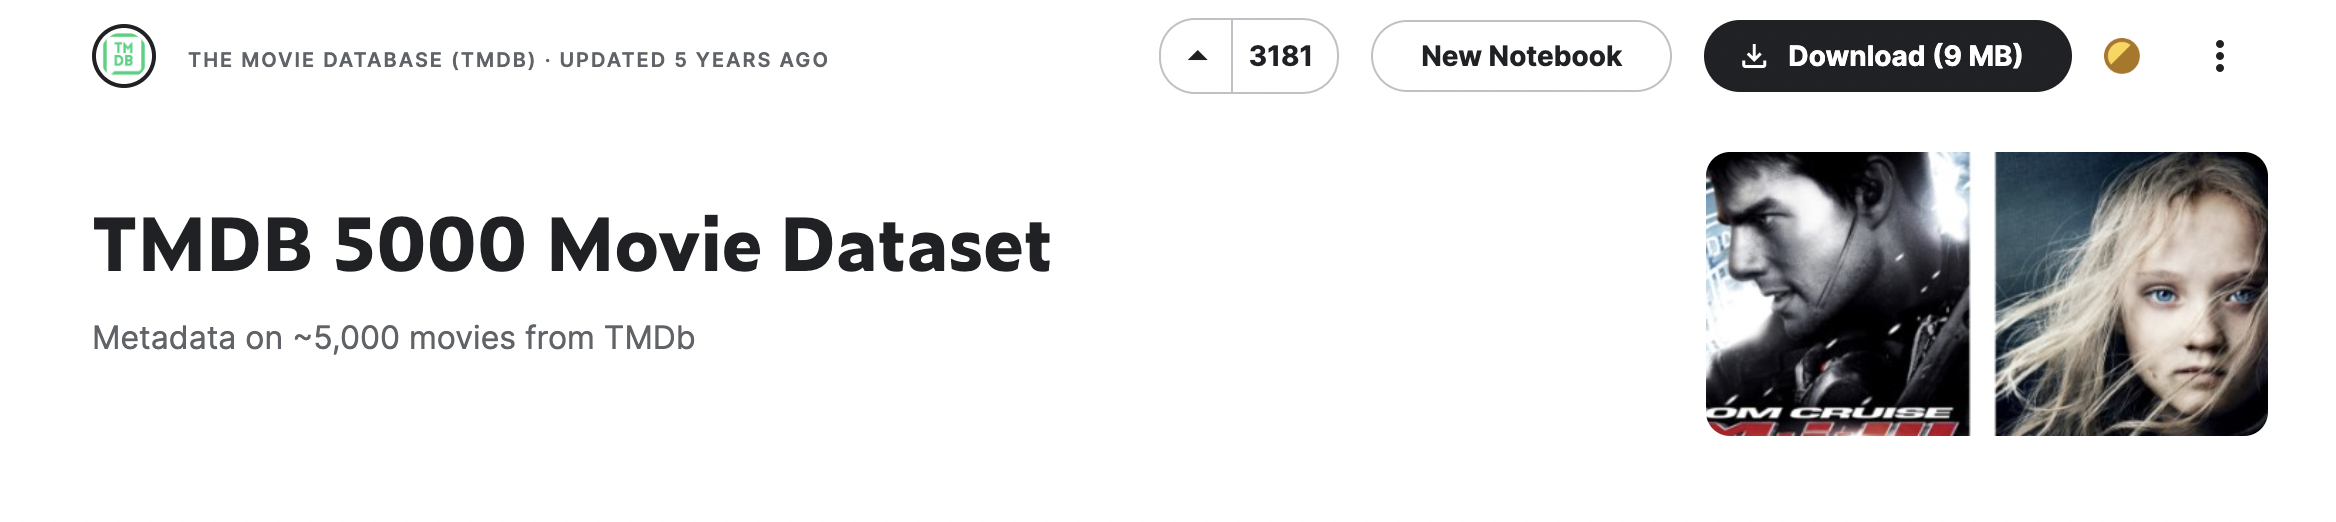


In [2]:
df2 = pd.read_csv("tmdb_5000_movies.csv")

In [3]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [118]:
df2.shape

(4803, 20)

# 2.Pre-processing

In [119]:
# build a new dataset for future processing
movie = df2.copy()

In [120]:
# drop unnecessary columns
drop = ['homepage', 'id', 'original_title', 'status', 'title', 'tagline', 'overview','vote_count', 'runtime','keywords']
movie = movie.drop(drop, axis = 1)

(array([  64.,    3.,   21.,   84.,  356., 1303., 1984.,  903.,   79.,
           6.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

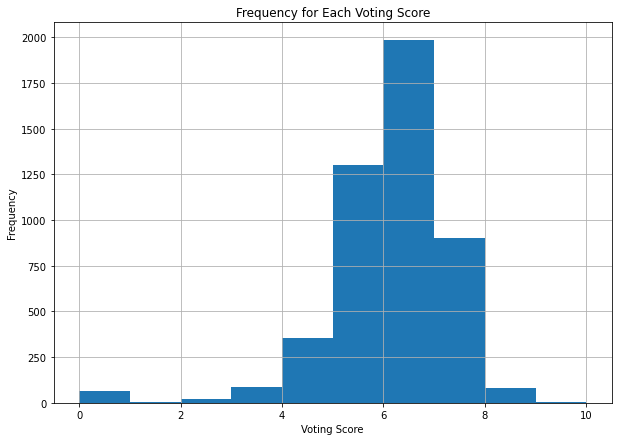

In [122]:
# check y: vote average
fig, ax = plt.subplots(figsize =(10, 7))
plt.title('Frequency for Each Voting Score')
plt.xlabel('Voting Score')
plt.ylabel('Frequency')
plt.grid()
ax.hist(movie['vote_average'].map(float))

In [38]:
movie['vote_average'].describe()

count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

In [39]:
# transfer voting scores into 3 classes
def assign_class(score):
    if (score <= 6.09):
        return 0
    else: 
        return 1

movie['vote_average'] = movie['vote_average'].map(assign_class)

In [40]:
# tranfer column "genres", "keywords", "production_countries", and "spoken_languages" 
# to list for each movie

def to_list(orig, idx):
    w_list = []
    origs = orig.replace("[{", "").replace("}]", "").replace("\"", "").split('}, {')
    try:
        for i in origs:
            w_list.append((i.split(', ')[idx].split(': ')[1]))
        return w_list
    except:
        return np.nan

In [41]:
movie['genres'] = movie['genres'].apply(lambda x: to_list(x, 1))
movie['production_countries'] = movie['production_countries'].apply(lambda x: to_list(x, 0))
movie['production_companies'] = movie['production_companies'].apply(lambda x: to_list(x, 0))
movie['spoken_languages'] = movie['spoken_languages'].apply(lambda x: to_list(x, 0))

In [42]:
# released years until today
def untiltoday(date):
    try:
        return 2022 - int(date.split('-')[0])
    except:
        return np.nan
movie['release_date'] = movie['release_date'].map(untiltoday)

In [43]:
# if it is from US, put 1; otherwise, 0
def country(countries):
    try:
        for c in countries:
            if (c == "US"):
                return 1
    except:
        return 0
movie['production_countries'] = movie['production_countries'].map(country)

In [44]:
# number of languages
def num_of_lan(languages):
    try:
        return len(languages)
    except:
        return 0
movie['num_languages'] = movie['spoken_languages'].map(num_of_lan)

In [45]:
# drop nas
movie = movie.dropna()

In [46]:
# we don't have nas right now
movie.isna().sum()

budget                  0
genres                  0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
spoken_languages        0
vote_average            0
num_languages           0
dtype: int64

In [47]:
movie.head()

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,spoken_languages,vote_average,num_languages
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",1.0,13.0,2787965087,"[en, es]",1,2
1,300000000,"[Adventure, Fantasy, Action]",en,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",1.0,15.0,961000000,[en],1,1
2,245000000,"[Action, Adventure, Crime]",en,107.376788,"[Columbia Pictures, Danjaq, B24]",1.0,7.0,880674609,"[fr, en, es, it, de]",1,5
3,250000000,"[Action, Crime, Drama, Thriller]",en,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",1.0,10.0,1084939099,[en],1,1
4,260000000,"[Action, Adventure, Science Fiction]",en,43.926995,[Walt Disney Pictures],1.0,10.0,284139100,[en],1,1


In [48]:
# normalize big numbers
movie['budget'] = movie['budget'].apply(lambda x: x/10**8)
movie['revenue']= movie['revenue'].apply(lambda x: x/10**8)

In [49]:
# set up dummy variables for categorical variables
mlb = MultiLabelBinarizer()

genres_vector = pd.DataFrame(mlb.fit_transform(movie['genres']),columns=mlb.classes_, index=movie.index)
production_companies_vector = pd.DataFrame(mlb.fit_transform(movie['production_companies']),columns=mlb.classes_, index=movie.index)
movie = pd.concat([movie, genres_vector, production_companies_vector], axis=1)

In [50]:
production_companies_vector.shape

(3811, 3816)

In [51]:
movie.head()

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,spoken_languages,vote_average,...,i5 Films,lucky crow films,nWave Pictures,platinum studios,rusty bear entertainment,thefyzz,thinkfilm,uFilm,verture Films,warner bross Turkey
0,2.37,"[Action, Adventure, Fantasy, Science Fiction]",en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",1.0,13.0,27.879651,"[en, es]",1,...,0,0,0,0,0,0,0,0,0,0
1,3.00,"[Adventure, Fantasy, Action]",en,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",1.0,15.0,9.610000,[en],1,...,0,0,0,0,0,0,0,0,0,0
2,2.45,"[Action, Adventure, Crime]",en,107.376788,"[Columbia Pictures, Danjaq, B24]",1.0,7.0,8.806746,"[fr, en, es, it, de]",1,...,0,0,0,0,0,0,0,0,0,0
3,2.50,"[Action, Crime, Drama, Thriller]",en,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",1.0,10.0,10.849391,[en],1,...,0,0,0,0,0,0,0,0,0,0
4,2.60,"[Action, Adventure, Science Fiction]",en,43.926995,[Walt Disney Pictures],1.0,10.0,2.841391,[en],1,...,0,0,0,0,0,0,0,0,0,0


# 3.Split train and test dataset

In [52]:
movie = movie.drop(['original_language','genres', 'production_companies', 'spoken_languages'], axis = 1)

In [58]:
y = movie['vote_average']
X = movie.drop(['vote_average'], axis = 1)



# Assign 25% to development set adn 75% to tranning set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,        
                                                    random_state=0, 
                                                    test_size=0.25
                                                    )

In [59]:
X_train.head()

,budget,popularity,production_countries,release_date,revenue,num_languages,Action,Adventure,Animation,Comedy,...,i5 Films,lucky crow films,nWave Pictures,platinum studios,rusty bear entertainment,thefyzz,thinkfilm,uFilm,verture Films,warner bross Turkey
2054,0.020,16.668854,1.0,10.0,0.144000,3,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1037,0.450,26.721386,1.0,25.0,1.810000,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4221,0.015,11.145915,1.0,77.0,0.070000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1137,0.400,19.438503,1.0,10.0,0.368937,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3763,0.040,11.387335,1.0,20.0,0.000000,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# 4.1 Modeling - Logistic Regression
## 4.1.1 penalty='none'

In [60]:
logreg_none = LogisticRegression(penalty='none', verbose=True)
logreg_none.fit(X_train, y_train)

prediction_train = logreg_none.predict(X_train)
predict_test = logreg_none.predict(X_test)
prediction_train = logreg_none.predict(X_train)
predict_test = logreg_none.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3843     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.98101D+03    |proj g|=  1.65883D+04

At iterate   50    f=  1.39742D+03    |proj g|=  1.42539D+02

At iterate  100    f=  1.18999D+03    |proj g|=  2.69962D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 3843    100    116      1     0     0   2.700D+02   1.190D+03
  F =   1189.9916301386420     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/xianglinchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


In [61]:
print(classification_report(y_train, prediction_train))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1221
           1       0.83      0.85      0.84      1637

    accuracy                           0.81      2858
   macro avg       0.81      0.81      0.81      2858
weighted avg       0.81      0.81      0.81      2858



In [62]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       412
           1       0.76      0.79      0.77       541

    accuracy                           0.74       953
   macro avg       0.73      0.73      0.73       953
weighted avg       0.74      0.74      0.74       953



## 4.1.2 penalty='l2'

In [111]:
logreg_l2 = LogisticRegression(penalty='l2', verbose=True)
logreg_l2.fit(X_train, y_train)

prediction_train = logreg_l2.predict(X_train)
predict_test = logreg_l2.predict(X_test)
prediction_train = logreg_l2.predict(X_train)
predict_test = logreg_l2.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3843     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.98101D+03    |proj g|=  1.65883D+04

At iterate   50    f=  1.40230D+03    |proj g|=  6.39152D+02

At iterate  100    f=  1.26976D+03    |proj g|=  1.26642D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 3843    100    111      1     0     0   1.266D+02   1.270D+03
  F =   1269.7603472524352     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/xianglinchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished


In [112]:
print(classification_report(y_train, prediction_train))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1221
           1       0.84      0.85      0.84      1637

    accuracy                           0.82      2858
   macro avg       0.81      0.81      0.81      2858
weighted avg       0.82      0.82      0.82      2858



In [113]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       412
           1       0.76      0.79      0.77       541

    accuracy                           0.74       953
   macro avg       0.73      0.73      0.73       953
weighted avg       0.74      0.74      0.74       953



# 4.2 Support Vector Machine

## 4.2.1 kernal is defult = "rbf"

In [69]:
from sklearn.svm import SVC

In [70]:
SVM = SVC()
SVM.fit(X_train, y_train)

SVC()

In [71]:
prediction_train = SVM.predict(X_train)
predict_test = SVM.predict(X_test)

In [72]:
print(classification_report(y_train, prediction_train))

              precision    recall  f1-score   support

           0       0.62      0.66      0.64      1221
           1       0.74      0.70      0.72      1637

    accuracy                           0.68      2858
   macro avg       0.68      0.68      0.68      2858
weighted avg       0.69      0.68      0.69      2858



In [73]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.59      0.63      0.61       412
           1       0.70      0.67      0.68       541

    accuracy                           0.65       953
   macro avg       0.65      0.65      0.65       953
weighted avg       0.65      0.65      0.65       953



## 4.2.2 kernel = 'linear'

In [74]:
SVM_linear = SVC(kernel='linear')
SVM_linear.fit(X_train, y_train)
prediction_train_linear = SVM_linear.predict(X_train)
predict_test_linear = SVM_linear.predict(X_test)

In [75]:
print(classification_report(y_train, prediction_train_linear))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1221
           1       0.92      0.94      0.93      1637

    accuracy                           0.92      2858
   macro avg       0.92      0.92      0.92      2858
weighted avg       0.92      0.92      0.92      2858



In [76]:
print(classification_report(y_test, predict_test_linear))

              precision    recall  f1-score   support

           0       0.69      0.66      0.68       412
           1       0.75      0.78      0.76       541

    accuracy                           0.73       953
   macro avg       0.72      0.72      0.72       953
weighted avg       0.73      0.73      0.73       953



## 4.2.3 kernel = 'poly'

In [77]:
SVM_poly = SVC(kernel='poly')
SVM_poly.fit(X_train, y_train)
prediction_train_poly = SVM_poly.predict(X_train)
predict_test_poly = SVM_poly.predict(X_test)

In [78]:
print(classification_report(y_train, prediction_train_poly))

              precision    recall  f1-score   support

           0       0.56      0.83      0.67      1221
           1       0.80      0.51      0.63      1637

    accuracy                           0.65      2858
   macro avg       0.68      0.67      0.65      2858
weighted avg       0.70      0.65      0.64      2858



In [79]:
print(classification_report(y_test, predict_test_poly))

              precision    recall  f1-score   support

           0       0.54      0.79      0.65       412
           1       0.76      0.49      0.60       541

    accuracy                           0.62       953
   macro avg       0.65      0.64      0.62       953
weighted avg       0.67      0.62      0.62       953



# 4.3 Random Forest

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
Random_Forest = RandomForestRegressor()
Random_Forest.fit(X_train, y_train)

RandomForestRegressor()

In [82]:
prediction_train = Random_Forest.predict(X_train)
predict_test = Random_Forest.predict(X_test)

In [83]:
print(classification_report(y_test, predict_test.round()))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       412
           1       0.76      0.79      0.78       541

    accuracy                           0.74       953
   macro avg       0.73      0.73      0.73       953
weighted avg       0.74      0.74      0.74       953



In [84]:
from sklearn.metrics import accuracy_score

In [85]:
def train_random(numberoftrees, depths):
    Random_Forest = RandomForestRegressor(n_estimators = numberoftrees, max_depth = depths)
    Random_Forest.fit(X_train, y_train)
    predict_train = Random_Forest.predict(X_train)
    predict_test = Random_Forest.predict(X_test)
    acc1 = accuracy_score(y_train, predict_train.round())
    acc2 = accuracy_score(y_test, predict_test.round())
    print("number of tree = ",numberoftrees, ", depths = ", depths)
    print("Train Accuracy: ", acc1)
    print("Test Accuracy: ", acc2)
    print("Difference:", acc1 - acc2)
    print()
    return acc1, acc2, acc1 - acc2

In [86]:
num_of_tree = [1,5,10,50,100]
depth = [1,5,10,50,100]
accuracy_train = []
accuracy_test = []
accuracy_diff = []

for i in range(5):
    acc_t = []
    acc_t2 = []
    diff = []
    for j in range(5):
        acc_train, acc_test,di = train_random(num_of_tree[i], depth[j])
        acc_t.append(acc_train)
        acc_t2.append(acc_test)
        diff.append(di)
        
    accuracy_train.append(acc_t)
    accuracy_test.append(acc_t2)
    accuracy_diff.append(diff)

number of tree =  1 , depths =  1
Train Accuracy:  0.6175647305808257
Test Accuracy:  0.5823714585519413
Difference: 0.03519327202888445

number of tree =  1 , depths =  5
Train Accuracy:  0.7295311406578027
Test Accuracy:  0.6873032528856243
Difference: 0.04222788777217834

number of tree =  1 , depths =  10
Train Accuracy:  0.8068579426172149
Test Accuracy:  0.6904512067156349
Difference: 0.11640673590158002

number of tree =  1 , depths =  50
Train Accuracy:  0.8901329601119664
Test Accuracy:  0.6526757607555089
Difference: 0.23745719935645748

number of tree =  1 , depths =  100
Train Accuracy:  0.8894331700489853
Test Accuracy:  0.6904512067156349
Difference: 0.1989819633333504

number of tree =  5 , depths =  1
Train Accuracy:  0.6207137858642408
Test Accuracy:  0.5844700944386149
Difference: 0.03624369142562589

number of tree =  5 , depths =  5
Train Accuracy:  0.761371588523443
Test Accuracy:  0.7030430220356768
Difference: 0.05832856648776619

number of tree =  5 , depths =  

In [87]:
import matplotlib.pyplot as plt

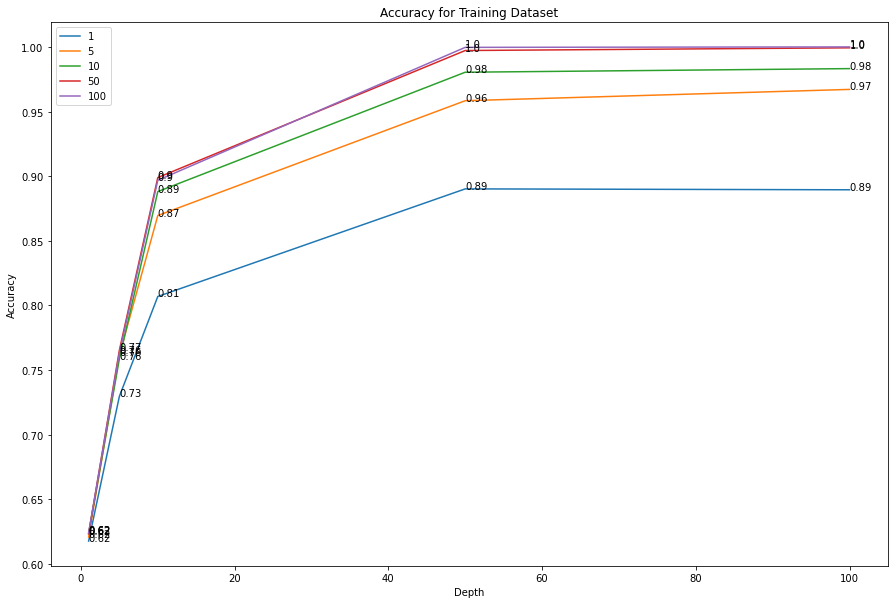

In [92]:
fig = plt.figure(figsize =(15, 10))

for i in range(5):
        plt.plot(np.array(depth), np.array(accuracy_train[i]), label = num_of_tree[i])
        for x,y in zip(np.array(depth), np.array(accuracy_train[i])):
            plt.annotate(str(round(y,2)),xy=(x,y))
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy for Training Dataset')
plt.legend()
plt.show()

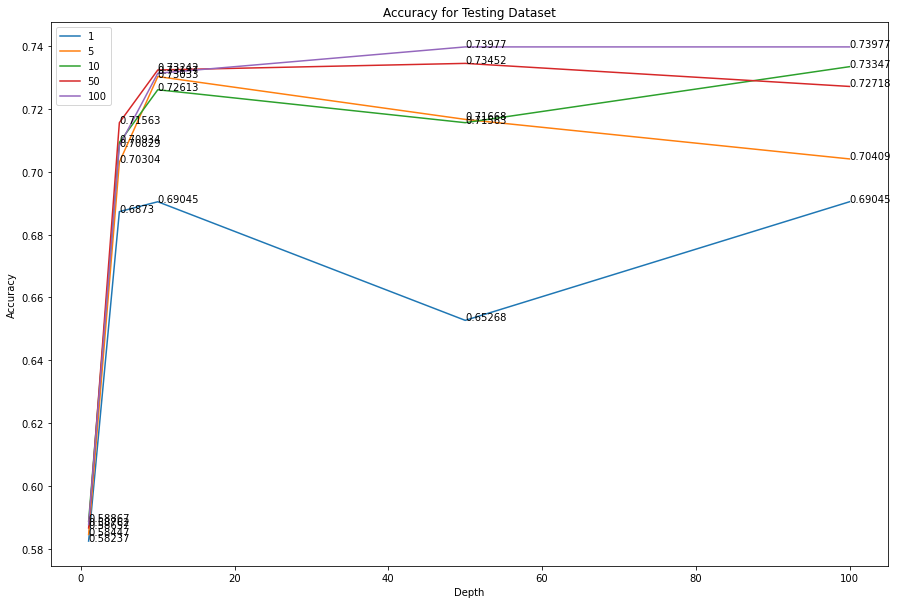

In [89]:
fig = plt.figure(figsize =(15, 10))

for i in range(5):
        plt.plot(np.array(depth), np.array(accuracy_test[i]), label = num_of_tree[i])
        for x,y in zip(np.array(depth), np.array(accuracy_test[i])):
            plt.annotate(str(round(y,5)),xy=(x,y))
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy for Testing Dataset')

plt.legend()
plt.show()

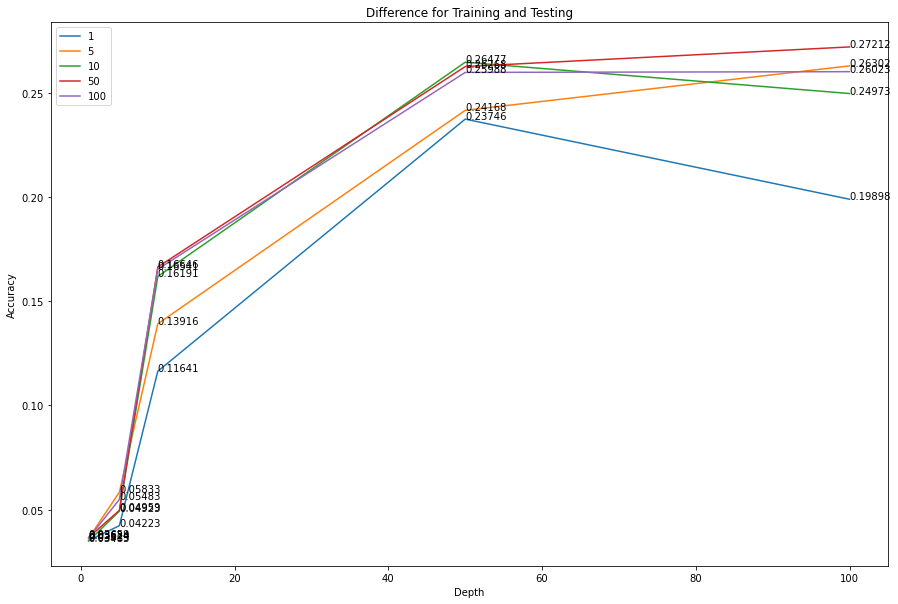

In [90]:
fig = plt.figure(figsize =(15, 10))

for i in range(5):
        plt.plot(np.array(depth), np.array(accuracy_diff[i]), label = num_of_tree[i])
        for x,y in zip(np.array(depth), np.array(accuracy_diff[i])):
            plt.annotate(str(round(y,5)),xy=(x,y))
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Difference for Training and Testing')

plt.legend()
plt.show()

In [108]:
Random_Forest = RandomForestRegressor(n_estimators = 50, max_depth = 5)
Random_Forest.fit(X_train, y_train)
predict_train = Random_Forest.predict(X_train)
predict_test = Random_Forest.predict(X_test)

In [109]:
print(classification_report(y_train, predict_train.round()))

              precision    recall  f1-score   support

           0       0.77      0.65      0.70      1221
           1       0.76      0.85      0.81      1637

    accuracy                           0.76      2858
   macro avg       0.76      0.75      0.75      2858
weighted avg       0.76      0.76      0.76      2858



In [110]:
print(classification_report(y_test, predict_test.round()))

              precision    recall  f1-score   support

           0       0.70      0.58      0.63       412
           1       0.72      0.81      0.76       541

    accuracy                           0.71       953
   macro avg       0.71      0.69      0.70       953
weighted avg       0.71      0.71      0.71       953



In [105]:
Random_Forest = RandomForestRegressor(n_estimators = 100, max_depth = 50)
Random_Forest.fit(X_train, y_train)
predict_train = Random_Forest.predict(X_train)
predict_test = Random_Forest.predict(X_test)

In [106]:
print(classification_report(y_train, predict_train.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1221
           1       1.00      1.00      1.00      1637

    accuracy                           1.00      2858
   macro avg       1.00      1.00      1.00      2858
weighted avg       1.00      1.00      1.00      2858



In [107]:
print(classification_report(y_test, predict_test.round()))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       412
           1       0.76      0.79      0.77       541

    accuracy                           0.74       953
   macro avg       0.73      0.73      0.73       953
weighted avg       0.74      0.74      0.74       953



# https://www.dataquest.io/blog/learning-curves-machine-learning/

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LogisticRegression(penalty='none', verbose = True),
X = X_train,
y = y_train, 
scoring = 'neg_mean_squared_error')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3843     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37312D+03    |proj g|=  1.16809D+04


In [ ]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)

In [ ]:
def learning_curves(estimator, data, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, data[features], data[target], train_sizes =
    train_sizes,
    cv = cv, scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,40)